In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
file_path_acc_loss = r"D:\MS_Thesis\Pre-defense-june\Results_for_update\Results_ACC_LOSS.xlsx"

In [2]:
df = pd.read_excel(file_path_acc_loss)
df

,Method,Epoch,Loss,Acc
0,QSGD,1,2.30000,0.08766
1,QSGD,2,1.83000,0.62934
2,QSGD,3,1.63924,0.81608
3,QSGD,4,1.60508,0.84321
4,QSGD,5,1.59531,0.83830
...,...,...,...,...
115,No Compression,6,1.70800,0.69528
116,No Compression,7,1.62200,0.84228
117,No Compression,8,1.55700,0.85095
118,No Compression,9,1.51800,0.93804


In [4]:
custom_palette = {
    'QSGD': '#1f77b4',
    'FP8': '#ff7f0e',                # Distinct color for FP8
    'PAQ': '#2ca02c',                # Distinct color for PAQ
    'Gzip': '#d62728',               # Distinct color for Gzip
    'Custom_Lin8': '#9467bd',        # Distinct color for Custom_Lin8
    'LP': '#8c564b',                 # Distinct color for Custom_Lin16 (LP)
    'FCQ': '#e377c2', # Distinct color for customFreq_singleDCT
    'FCQ-DDCT': '#7f7f7f',        # Distinct color for Custom_Freq
    'LFP': '#bcbd22', # Distinct color for customFreq_2_singleDCT
    'LFP-DDCT': '#17becf',                # Distinct color for Custom_Freq_Two (LFQ)
    'Adaptive': '#393b79',           # Distinct color for Adaptive
    'No Compression': '#7b4173'  
        # Distinct color for No Compression
}

In [3]:
df['Method'].unique()


array(['QSGD', 'FP8', 'PAQ', 'Gzip', 'Custom_Lin8', 'Custom_Lin16',
       'customFreq_singleDCT', 'Custom_Freq', 'customFreq_2_singleDCT',
       'Custom_Freq_Two', 'Adaptive', 'No Compression'], dtype=object)

In [13]:
methods_to_include = ['FP8','Custom_Freq_Two','No Compression']  # Add your desired method names here
filtered_df = df[df['Method'].isin(methods_to_include)].reset_index(drop=True)
legend_mapping = {'customFreq_singleDCT': 'FCQ', 'Custom_Freq': 'FCQ-DDCT','customFreq_2_singleDCT': 'LFP',
       'Custom_Freq_Two': 'LFP-DDCT', 'Custom_Lin16':'LP'}
filtered_df['Method'] = filtered_df['Method'].replace(legend_mapping)

print(filtered_df)

            Method  Epoch     Loss      Acc
0              FP8      1  2.30097  0.10314
1              FP8      2  1.96503  0.53190
2              FP8      3  1.68795  0.81605
3              FP8      4  1.60941  0.87063
4              FP8      5  1.57527  0.89446
5              FP8      6  1.56399  0.90360
6              FP8      7  1.55506  0.91413
7              FP8      8  1.54873  0.91528
8              FP8      9  1.54271  0.92259
9              FP8     10  1.54229  0.92607
10        LFP-DDCT      1  2.30100  0.10100
11        LFP-DDCT      2  2.05580  0.27110
12        LFP-DDCT      3  1.78040  0.67310
13        LFP-DDCT      4  1.64230  0.83030
14        LFP-DDCT      5  1.59150  0.87030
15        LFP-DDCT      6  1.56930  0.88550
16        LFP-DDCT      7  1.55500  0.89710
17        LFP-DDCT      8  1.54830  0.90830
18        LFP-DDCT      9  1.54570  0.91510
19        LFP-DDCT     10  1.53680  0.92120
20  No Compression      1  2.30100  0.10228
21  No Compression      2  2.089

e:\Fetal_project\FMdata-analysis-main\maim_conda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
e:\Fetal_project\FMdata-analysis-main\maim_conda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


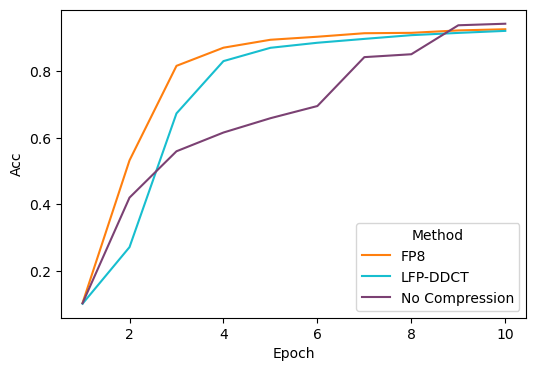

In [14]:
plt.figure(figsize=(6, 4))

acc_plot = sns.lineplot(data=filtered_df, x='Epoch', y='Acc', hue='Method', palette=custom_palette)

e:\Fetal_project\FMdata-analysis-main\maim_conda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
e:\Fetal_project\FMdata-analysis-main\maim_conda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


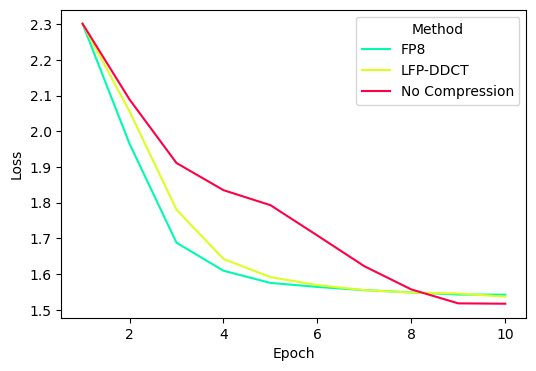

In [15]:
plt.figure(figsize=(6, 4))
loss_plot = sns.lineplot(data=filtered_df, x='Epoch', y='Loss', hue='Method',palette='gist_ncar')


In [16]:
acc_plot.figure.savefig('D:\MS_Thesis\Pre-defense-june\Results_for_update\proposed_vs_exisiting_bests_schemes.pdf')

In [31]:
loss_plot.figure.savefig('D:\MS_Thesis\Pre-defense-june\Results_for_update\Adaptive_loss.pdf')

In [27]:
df = pd.read_csv(r'E:\MS_Thesis\Pre-defense-june\Results_for_update\scheme_TIME_EFF_sheet.csv')
df

,scheme_name,Time,Efficiency
0,Custom_linear,19.822404,0.275862
1,QSGD,21.325796,0.528846
2,FP8,29.470232,0.528846
3,customFreq_2,31.563713,0.275862
4,Custom_linear_16,20.701357,0.413793
5,customFreq,NaN,0.190476
6,customFreq_singleDCT,NaN,0.190476
7,customFreq_2_singleDCT,NaN,0.275862
8,customFreq_1_5,NaN,0.190476


In [21]:
plt.figure(figsize=(6, 4))
# acc_plot = sns.lineplot(data=df, x='Epoch', y='Accuracy', hue='Method')
time_plot = sns.barplot(data=df, x="Method", y="Time(s)")
time_plot.figure.savefig('E:\MS_Thesis\mid-defense\Results\TimePlot.pdf')

ValueError: Could not interpret input 'Time(s)'

<Figure size 600x400 with 0 Axes>

In [5]:
df = pd.read_excel(r"E:\MS_Thesis\mid-defense-april\Results\qunatization_compression_eff.xlsx")
# df"E:\MS_Thesis\mid-defense-april\Results\qunatization_compression_eff.xlsx"

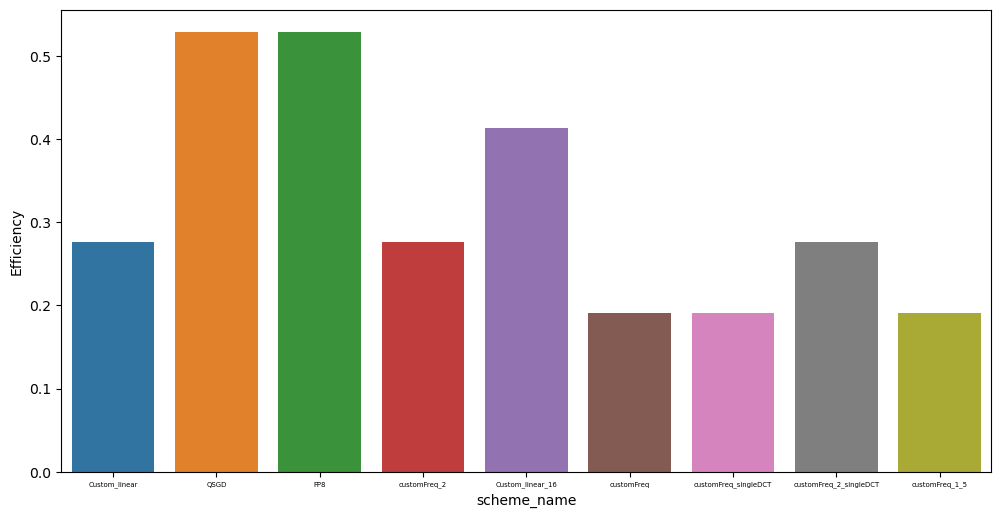

In [35]:
plt.figure(figsize=(12, 6))
# acc_plot = sns.lineplot(data=df, x='Epoch', y='Accuracy', hue='Method')
time_plot = sns.barplot(data=df, x="scheme_name", y="Efficiency")
plt.xticks(fontsize=5) 
time_plot.figure.savefig('E:\MS_Thesis\Pre-defense-june\Results_for_update\EffPlot.pdf')

# Latency plot

In [2]:
df = pd.read_csv(r"D:\MS_Thesis\Pre-defense-june\Results_for_update\client_latency_data_adaptive.csv")
df

,Client,Bandwidth,Traffic,Latency,Compression
0,217,1978,4,0.106782,Custom_linear_16
1,121,1457,28,0.100339,Custom_linear_16
2,266,114,8,0.119477,QSGD
3,315,733,38,0.103472,Custom_linear_16
4,127,1276,32,0.098254,Custom_linear_16
...,...,...,...,...,...
323,73,2190,15,0.110292,Custom_linear_16
324,173,467,17,0.105752,QSGD
325,128,779,8,0.098280,QSGD
326,107,1990,46,0.173765,customFreq_2


In [7]:
# filtered_df = df[df['Compression'].isin(methods_to_include)].reset_index(drop=True)
legend_mapping = {'customFreq_singleDCT': 'FCQ', 'Custom_Freq': 'FCQ-DDCT','customFreq_2_singleDCT': 'LFP',
       'customFreq_2': 'LFP-DDCT', 'Custom_linear_16':'LP'}
filtered_df = df.copy()
filtered_df['Compression'] = filtered_df['Compression'].replace(legend_mapping)

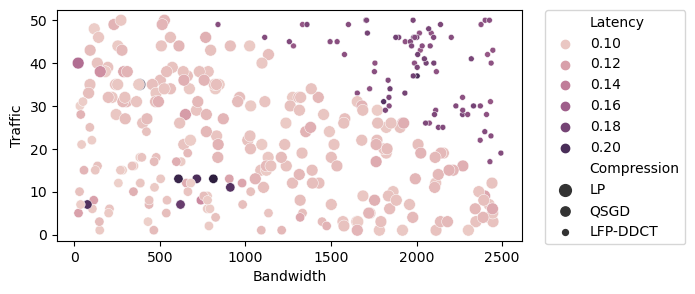

In [8]:
plt.figure(figsize=(6,3))
sns.scatterplot(data=filtered_df,x='Bandwidth',y='Traffic', hue = 'Latency', size ='Compression',legend='auto')
# Move the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

# Show the plot
plt.show()

<Axes: xlabel='Bandwidth', ylabel='Traffic'>

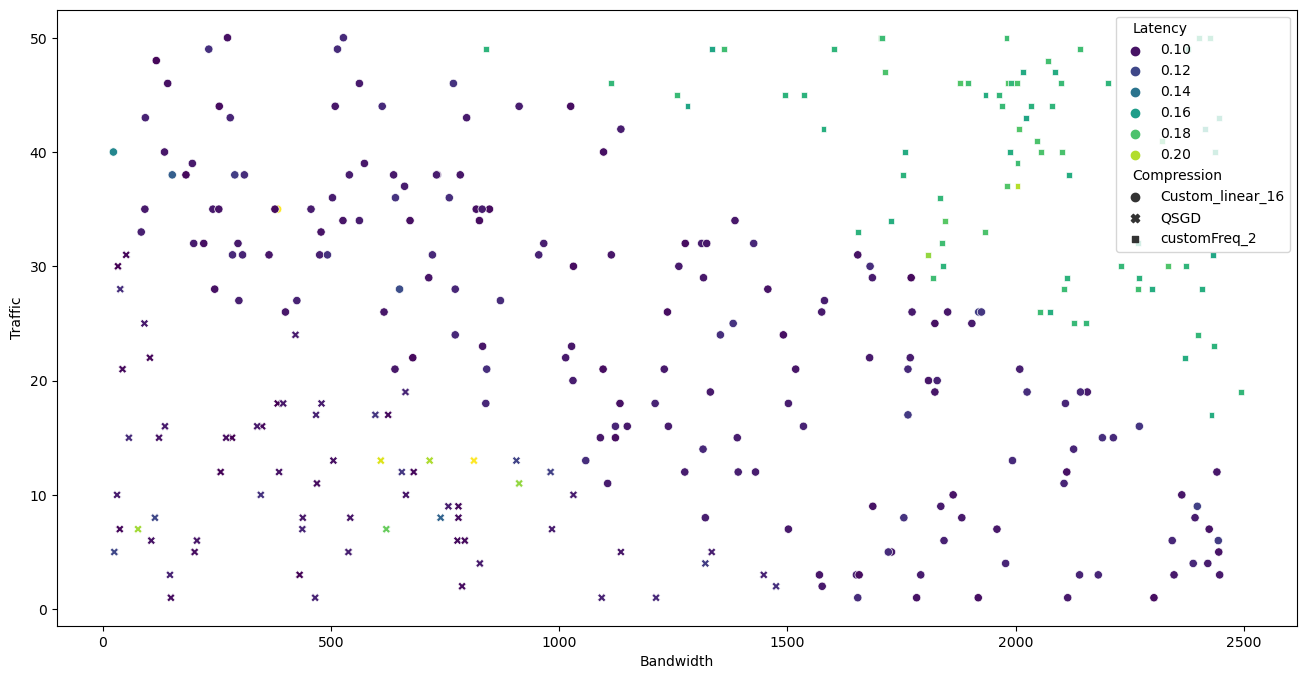

In [17]:
plt.figure(figsize=(16,8))
sns.scatterplot(data=df,x='Bandwidth',y='Traffic', hue = 'Latency', style ='Compression', palette='viridis')

<Axes: xlabel='Compression', ylabel='Client'>

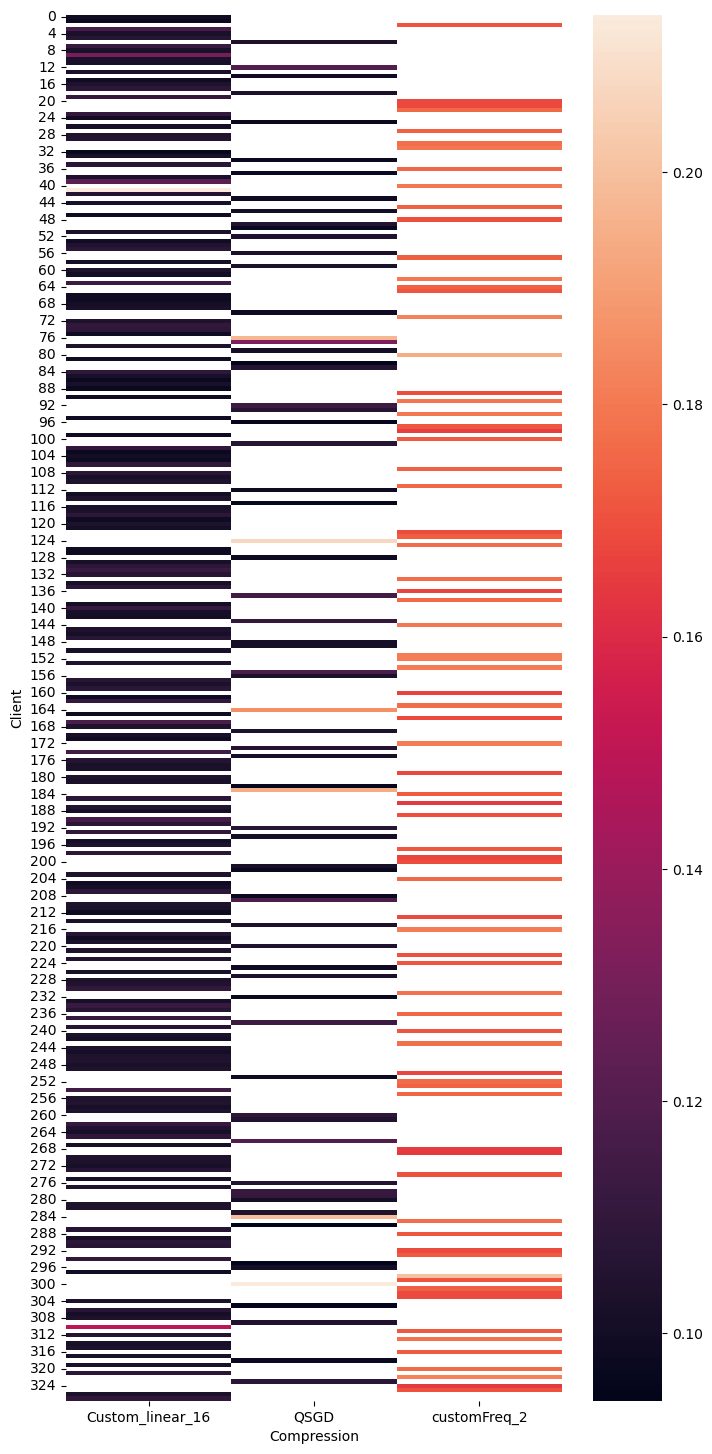

In [21]:
plt.figure(figsize=(8,18))
df2 = df.pivot(index="Client", columns="Compression", values="Latency")
sns.heatmap(df2)

<Axes: xlabel='Bandwidth', ylabel='Traffic'>

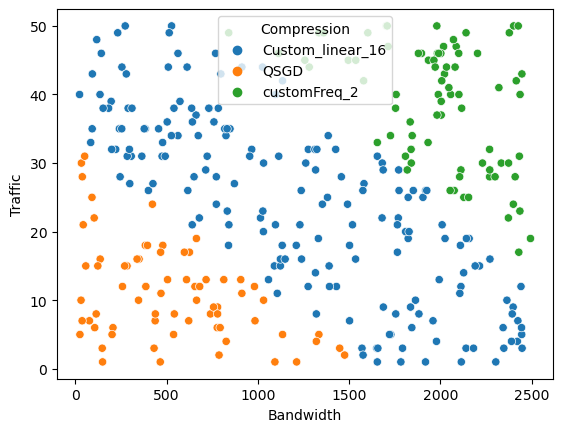

In [5]:
# sns.swarmplot(data=df, x="Traffic", y="Bandwidth", hue="Compression", legend=True)
# sns.scatterplot(data=df, x="Traffic", y="Bandwidth", hue="Compression", legend=True)
sns.scatterplot(data=df, y="Traffic", x="Bandwidth", hue="Compression", legend=True)


In [96]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib.colors import Normalize, ListedColormap

def scatterplot_3d(data=None, *, x=None, y=None, z=None, hue=None, size=None, style=None, 
                   palette=None, hue_order=None, hue_norm=None, sizes=None, size_order=None, 
                   size_norm=None, markers=True, style_order=None, legend='auto', ax=None, 
                   figsize=(10, 8), alpha=0.8, azim=-60, elev=30, **kwargs):
    
    """
    3D scatter plot with seaborn-like interface using matplotlib, including viewing angles.
    
    Parameters:
    -----------
    data : pd.DataFrame
        The dataframe containing the data.
    x, y, z : str
        Column names for the x, y, and z axes.
    hue : str, optional
        Column name for the color of the points.
    size : str, optional
        Column name for the size of the points.
    style : str, optional
        Column name for the style (marker shape) of the points.
    palette : dict, list, or seaborn color palette, optional
        Colors to use for the hue variable.
    hue_order : list, optional
        Order to plot the hue levels.
    hue_norm : tuple, optional
        Normalization range for the hue variable (vmin, vmax).
    sizes : tuple, optional
        Min and max size for point scaling (e.g. (20, 200)).
    size_order : list, optional
        Order of levels to map size values.
    size_norm : tuple, optional
        Normalization range for the size variable.
    markers : bool or dict, optional
        Marker style for the points. Can be a bool (True for default markers), or a dict mapping 
        levels of the style variable to specific marker styles.
    style_order : list, optional
        Order to plot the style variable levels.
    legend : str, optional
        Whether to include a legend ('auto', 'brief', 'full', or False).
    ax : matplotlib Axes, optional
        Pre-existing axes for the plot. Otherwise, a new figure and axes are created.
    figsize : tuple, optional
        Figure size, default is (10, 8).
    alpha : float, optional
        Transparency level for points, default is 0.8.
    azim: float, optional
        Azimuthal angle, i.e, rotation around the z-axis, default is -60.
    elev: float, optional
        Elevation angle, i.e, height above the xy-plane, default is 30.
    **kwargs : keyword arguments
        Additional arguments passed to the scatter plot.
        
    Returns:
    --------
    fig, ax : matplotlib figure and axes objects.
    """
    
    # Create a new figure and 3D axis if ax is not provided
    if ax is None:
        fig = plt.figure(figsize=figsize)
        ax = fig.add_subplot(111, projection='3d')
    else:
        fig = ax.get_figure()

    # Set the viewing angle
    ax.view_init(elev=elev, azim=azim)

    # Extract x, y, z data from the DataFrame
    x_data = data[x]
    y_data = data[y]
    z_data = data[z]
    
    # Handle hue (color mapping)
    if hue:
        hue_data = data[hue]
        if pd.api.types.is_numeric_dtype(hue_data):
            # If hue is continuous (numeric)
            norm = hue_norm or (hue_data.min(), hue_data.max())
            if palette is None:
                palette = sns.color_palette("viridis", as_cmap=True)
            cmap = plt.get_cmap(palette) if isinstance(palette, str) else palette
            colors = cmap(Normalize(*norm)(hue_data))
        else:
            # If hue is categorical
            unique_hue = hue_order if hue_order else hue_data.unique()
            if palette is None:
                palette = sns.color_palette(n_colors=len(unique_hue))
            elif isinstance(palette, str):
                palette = sns.color_palette(palette, n_colors=len(unique_hue))
            elif isinstance(palette, list):
                palette = sns.color_palette(palette, n_colors=len(unique_hue))
            hue_palette = dict(zip(unique_hue, palette))
            colors = hue_data.map(hue_palette)
    else:
        colors = np.full(len(data), 'b')  # Default color (array)

    # Handle size (point size mapping)
    if size:
        size_data = data[size]
        if sizes is None:
            sizes = (20, 200)  # Default range for sizes
        if size_norm:
            size_norm_func = Normalize(vmin=size_norm[0], vmax=size_norm[1])
        else:
            size_norm_func = Normalize(vmin=size_data.min(), vmax=size_data.max())
        sizes = size_norm_func(size_data) * (sizes[1] - sizes[0]) + sizes[0]
    else:
        sizes = np.full(len(data), 20)  # Default size (array)

    # Handle style (marker style mapping)
    if style:
        style_data = data[style]
        unique_styles = style_order if style_order else style_data.unique()
        if markers is True:
            markers = ['o', '^', 's', 'P', 'D', '*', 'X']  # Default marker set
        elif isinstance(markers, dict):
            pass  # Use custom markers if provided
        else:
            raise ValueError("`markers` should be True, False, or a dictionary of styles.")
        
        if isinstance(markers, list):
            marker_map = dict(zip(unique_styles, markers))
        else:
            marker_map = markers
        marker_list = style_data.map(marker_map).fillna('o')
    else:
        marker_list = np.full(len(data), 'o')  # Default marker style

    # Create the scatter plot
    plotted_handles = []
    plotted_labels = []
    
    for marker_style in pd.unique(marker_list):
        for unique_hue in pd.unique(hue_data):
            mask = (marker_list == marker_style) & (hue_data == unique_hue)
            label = unique_hue if mask.any() else None
            
            scatter = ax.scatter(x_data[mask], y_data[mask], z_data[mask],
                                 c=np.array(colors)[mask],
                                 s=np.array(sizes)[mask],
                                 marker=marker_style, alpha=alpha, label=label, **kwargs)
            
            if label and label not in plotted_labels:
                plotted_handles.append(scatter)
                plotted_labels.append(label)

    # If hue is provided, add color bar for continuous or legend for categorical
    if hue:
        if pd.api.types.is_numeric_dtype(hue_data):
            norm = Normalize(vmin=hue_data.min(), vmax=hue_data.max())
            sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
            sm.set_array([])
            fig.colorbar(sm, ax=ax, label=hue)
        elif legend != False:
            # Plot legend for categorical hue
            ax.legend(plotted_handles, plotted_labels, loc='best', title=hue)

    # Set axis labels
    ax.set_xlabel(x)
    ax.set_ylabel(y)
    ax.set_zlabel(z)

    plt.tight_layout()

    plt.show()
    return fig, ax


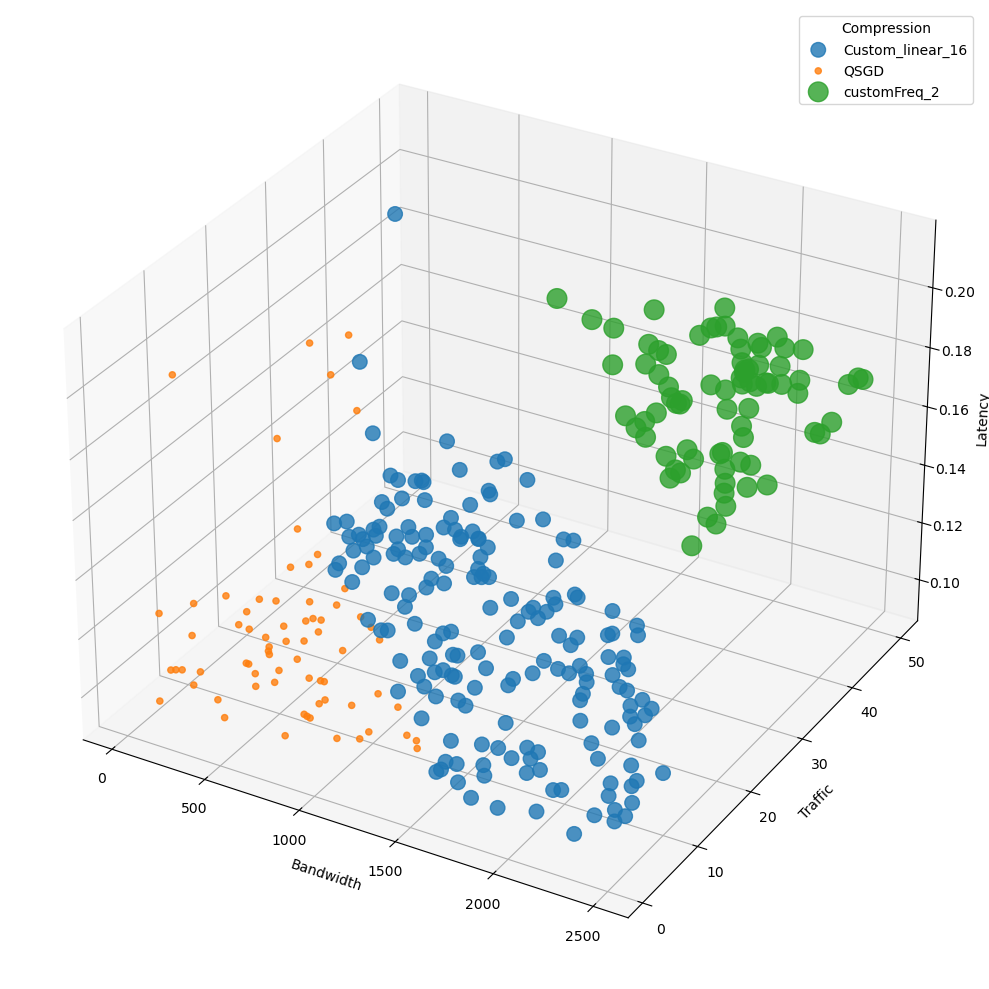

In [21]:

comp_map = {
    'QSGD': 0,
    'Custom_linear_16': 1,
    'customFreq_2': 2,
}
new_df = df.copy()
new_df['Schemes'] = new_df['Compression'].map(comp_map)
legend_mapping = {'customFreq_singleDCT': 'FCQ', 'Custom_Freq': 'FCQ-DDCT','customFreq_2_singleDCT': 'LFP',
       'Custom_Freq_Two': 'LFP-DDCT'}
plot_3d = scatterplot_3d(new_df, x = 'Bandwidth', y='Traffic',z='Latency', hue='Compression', size = 'Schemes', figsize=(10, 16))
# plot_3d[0].savefig('D:\MS_Thesis\Pre-defense-june\Results_for_update\plot_3d.pdf')

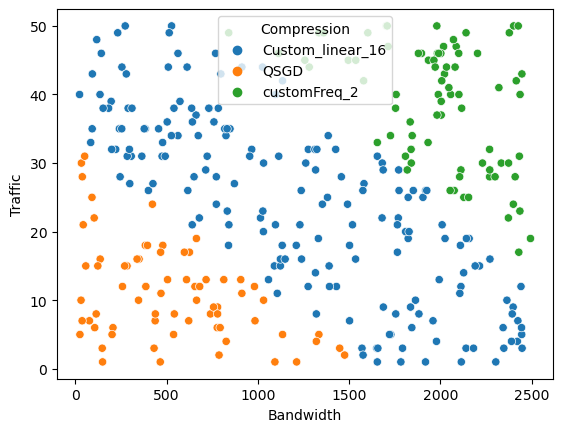

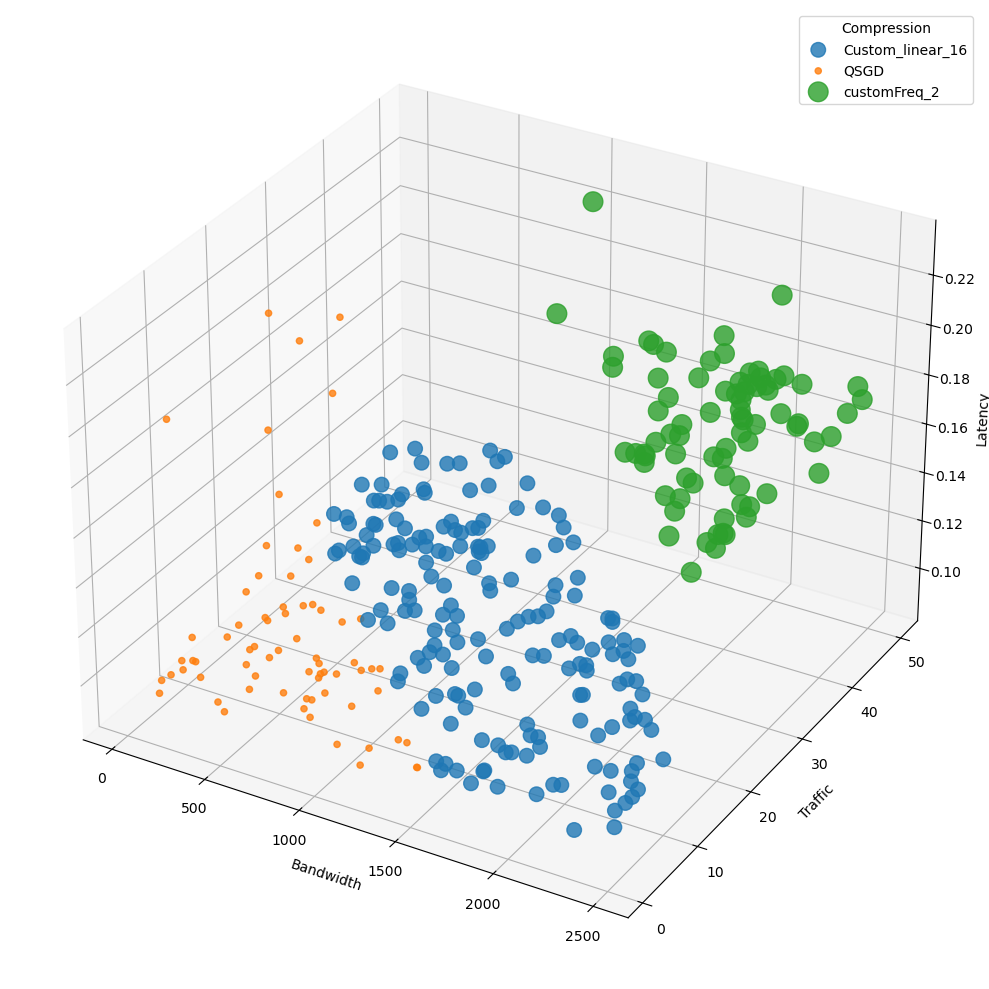

In [26]:
df = pd.read_csv(r"D:\MS_Thesis\Pre-defense-june\hyperparameter_tuning\client_latency_data_w_acc0.8_w_time_0.3_w_eff_0.2.csv")
sns.scatterplot(data=df, y="Traffic", x="Bandwidth", hue="Compression", legend=True)
comp_map = {
    'QSGD': 0,
    'Custom_linear_16': 1,
    'customFreq_2': 2,
}
new_df = df.copy()
new_df['Schemes'] = new_df['Compression'].map(comp_map)

plot_3d = scatterplot_3d(new_df, x = 'Bandwidth', y='Traffic',z='Latency', hue='Compression', size = 'Schemes', figsize=(10, 16))
plot_3d[0].savefig('D:\MS_Thesis\Pre-defense-june\hyperparameter_tuning\client_latency_data_w_acc_0.5_w_time_0.3_w_eff_0.2.pdf')

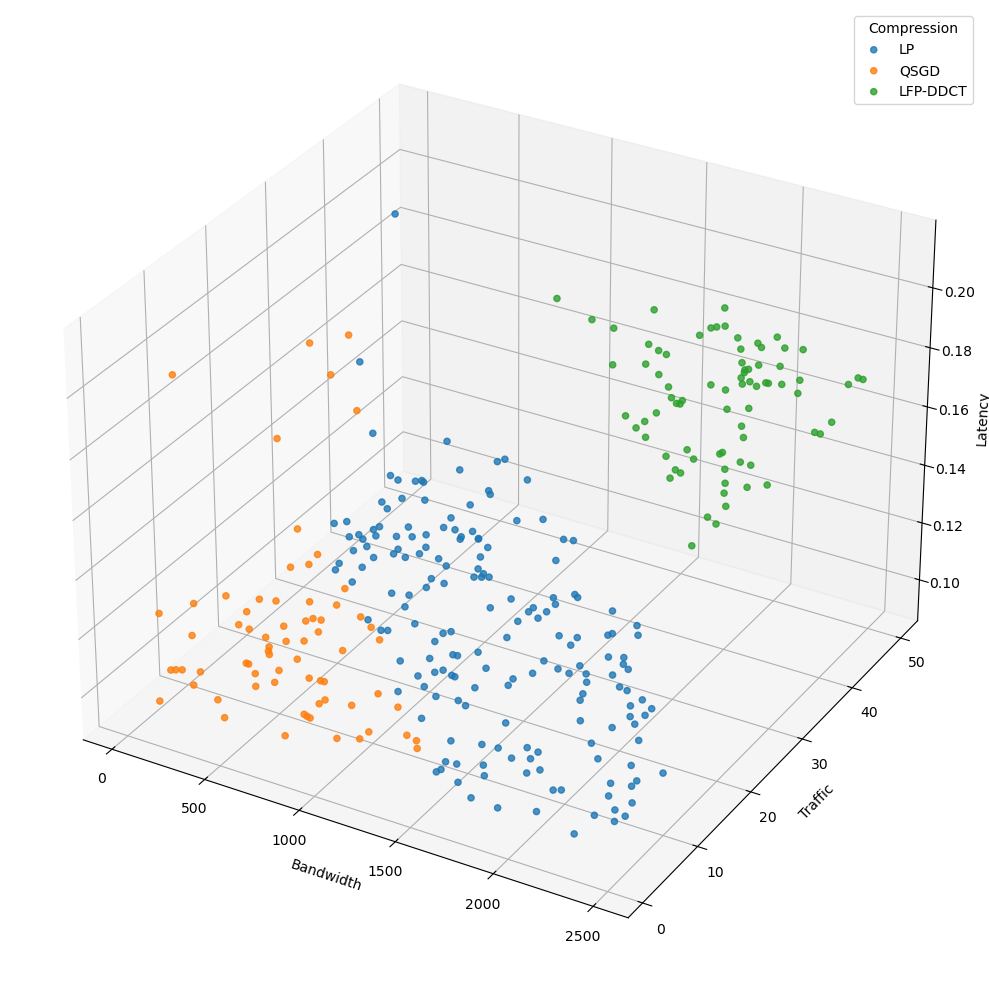

In [105]:

# comp_map = {
#     'QSGD': 0,
#     'Custom_linear_16': 1,
#     'customFreq_2': 2,
# }


comp_map = {
    'QSGD': 0,
    'LP': 1,
    'LFP-DDCT': 2,

}
new_df = df.copy()
new_df['Schemes'] = new_df['Compression'].map(comp_map)
legend_mapping = {'customFreq_singleDCT': 'FCQ', 'Custom_Freq': 'FCQ-DDCT','customFreq_2_singleDCT': 'LFP',
       'customFreq_2': 'LFP-DDCT','Custom_linear_16':'LP'}
new_df['Compression'] = new_df['Compression'].replace(legend_mapping)

plot_3d = scatterplot_3d(new_df, x = 'Bandwidth', y='Traffic',z='Latency', hue='Compression', size = 'Schemes', figsize=(10, 16))
# plot_3d[0].savefig('D:\MS_Thesis\Pre-defense-june\Results_for_update\plot_3d.pdf')

In [103]:
new_df

,Client,Bandwidth,Traffic,Latency,Compression,Schemes
0,217,1978,4,0.106782,Custom_linear_16,NaN
1,121,1457,28,0.100339,Custom_linear_16,NaN
2,266,114,8,0.119477,QSGD,0.0
3,315,733,38,0.103472,Custom_linear_16,NaN
4,127,1276,32,0.098254,Custom_linear_16,NaN
...,...,...,...,...,...,...
323,73,2190,15,0.110292,Custom_linear_16,NaN
324,173,467,17,0.105752,QSGD,0.0
325,128,779,8,0.098280,QSGD,0.0
326,107,1990,46,0.173765,customFreq_2,NaN
